In [1]:
MODEL_NAME = 'italiaNet_v3'
IMG_SIZE = 128


In [2]:
##CONSTRUCTING THE NETWORK##

from tflearn.layers.core import input_data, fully_connected, dropout
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression

net = input_data(shape=(None,128,128,3))
net = conv_2d(net, 32, 3, activation='relu',regularizer='L2')
net = max_pool_2d(net, 2)

net = conv_2d(net, 64, 3, activation='relu',regularizer='L2')
net = max_pool_2d(net, 2)

net = conv_2d(net, 128, 3, activation='relu',regularizer='L2')
net = max_pool_2d(net, 2)

net = conv_2d(net, 256, 3, activation='relu',regularizer='L2')
net = max_pool_2d(net, 2)

net = conv_2d(net, 512, 3, activation='relu',regularizer='L2')
net = max_pool_2d(net, 2)

net = conv_2d(net, 256, 3, activation='relu',regularizer='L2')
net = max_pool_2d(net, 2)


net = fully_connected(net, 1024, activation='relu')
net = dropout(net, 0.9)

net = fully_connected(net, 2, activation='softmax')

net = regression(net, optimizer='adam', learning_rate=1e-3,
                     loss='categorical_crossentropy')

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [3]:
#LOAD DATA FOR DISPLAY##

import matplotlib.pyplot as plt
import h5py
import numpy as np
import random
from tflearn.models.dnn import DNN

model = DNN(net)
model.load('{}.model'.format(MODEL_NAME))

h5f = h5py.File('dataset.h5', 'r')
imgs = np.asarray(h5f['X'])
labels = h5f['Y']

INFO:tensorflow:Restoring parameters from D:\Coding\Python\Italianet\italiaNet_v3.model


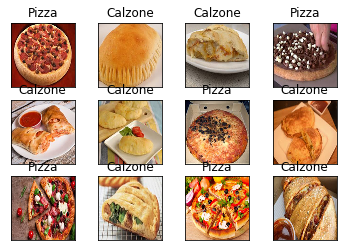

In [4]:
##DISPLAY DATA##

fig = plt.figure()
random.shuffle(imgs)

for num, data in enumerate(imgs[-12:]):
    img_data = data
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 3)
    
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label = 'Pizza'
    else: str_label = 'Calzone'
    
    pizzaness = round(model_out[1]*100, 2)
    
   # if pizzaness >= 50:
   #     str_label = '{}% pizza'.format(pizzaness)
   # else:
   #     str_label = '{}% calzone'.format(100-pizzaness)
    
    y.imshow(orig)
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

plt.show()

[ 0.76155561  0.23844445]


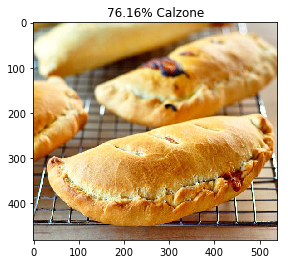

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("sample.jpg")
orig = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

im = cv2.resize(orig,(128,128))/255

model_out = model.predict([im])[0]
print(model_out)
pizzaness = round(model_out[1]*100, 2)
    
if pizzaness >= 50:
    str_label = '{}% Pizza'.format(pizzaness)
else:
    str_label = '{}% Calzone'.format(100-pizzaness)

plt.imshow(orig,interpolation='nearest')
plt.title(str_label)
plt.show()
